INTERNSHIP PROJECT


# HEART DIESEASE PREDICTION

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('/content/sample_data/heart_disease_data.csv')
print(data)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.shape

(303, 14)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:

duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in heart disease dataset: {num_duplicates}")
if num_duplicates > 0:
    print("Duplicate rows:")
    print(data[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows in heart disease dataset: 1
Duplicate rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [8]:
print(data.iloc[164])

age          38.0
sex           1.0
cp            2.0
trestbps    138.0
chol        175.0
fbs           0.0
restecg       1.0
thalach     173.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            4.0
thal          2.0
target        1.0
Name: 164, dtype: float64


In [9]:
print(data.iloc[165])

age          67.0
sex           1.0
cp            0.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         1.0
ca            3.0
thal          2.0
target        0.0
Name: 165, dtype: float64


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.target.value_counts()

,count
target,
1,165
0,138


In [12]:
x = data.drop(columns='target',axis=1)
y  = data['target']

In [13]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [14]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [15]:
#splitting the data into the traing data and testing data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [17]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
#now i'm traing the data im here using logistic regression as it works better for binary classification.

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

evalution


In [19]:
x_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_pred,y_train)
print(training_data_accuracy)

0.8512396694214877


accuracy of test data


In [20]:
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)
print(test_data_accuracy)

0.819672131147541


Testing with The New Data


In [21]:
import numpy as np

input_data = (45, 1, 2, 130, 250, 1, 0, 140, 0, 1.5, 1, 1, 1)

input_as_array = np.asarray(input_data)

input_reshaped = input_as_array.reshape(1, -1)

prediction_output= model.predict(input_reshaped)


print(prediction_output)
if(prediction_output[0]==0):
  print('the person does not have a heart disease')
else:
  print('the person has heart disease')

[1]
the person has heart disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


OVERVIEW

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sex'),
  Text(2, 0, 'Chest Pain Type'),
  Text(3, 0, 'Resting BP'),
  Text(4, 0, 'Cholesterol'),
  Text(5, 0, 'Fasting Blood Sugar'),
  Text(6, 0, 'Rest ECG'),
  Text(7, 0, 'Max Heart Rate'),
  Text(8, 0, 'Exercise Angina'),
  Text(9, 0, 'ST Depression'),
  Text(10, 0, 'Major Vessels'),
  Text(11, 0, 'Thalassemia'),
  Text(12, 0, 'Slope')])

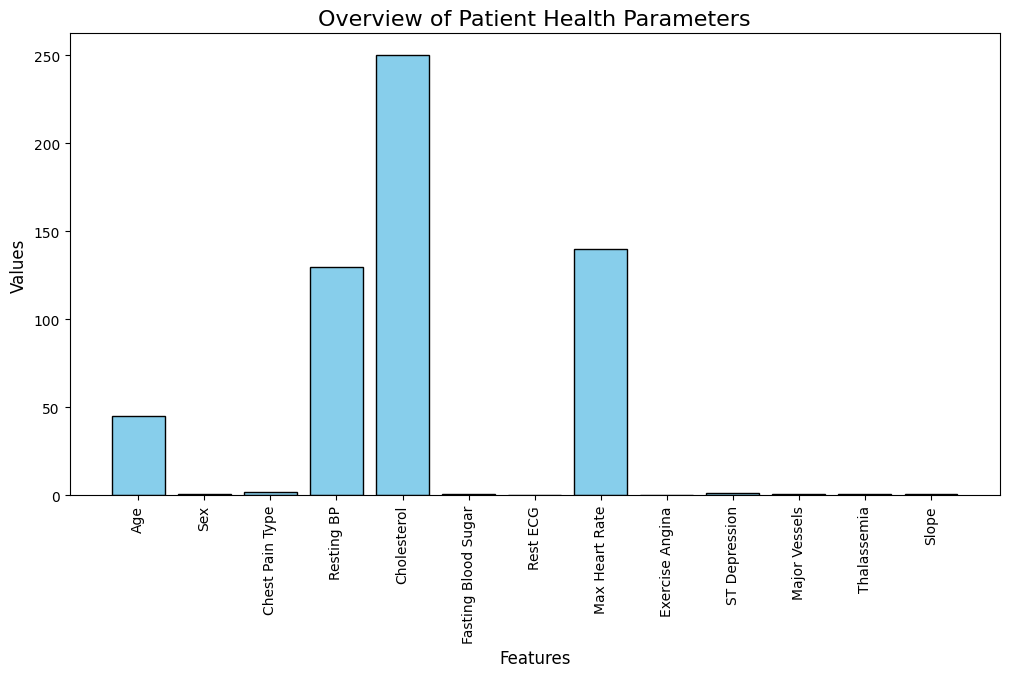

In [23]:
features = ['Age', 'Sex', 'Chest Pain Type', 'Resting BP', 'Cholesterol',
            'Fasting Blood Sugar', 'Rest ECG', 'Max Heart Rate', 'Exercise Angina',
            'ST Depression', 'Major Vessels', 'Thalassemia', 'Slope']

#person_data = [57, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2]
person_data_2 = [45, 1, 2, 130, 250, 1, 0, 140, 0, 1.5, 1, 1, 1]


plt.figure(figsize=(12, 6))
bars = plt.bar(features, person_data_2, color='skyblue', edgecolor='black')
plt.title('Overview of Patient Health Parameters', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)

CONCLUSION

 -> In this project, I successfully built a machine learning model to predict the presence of heart disease based on various medical parameters such as age, cholesterol levels, chest pain type, blood pressure, maximum heart rate, and other key health indicators.

 -> Through careful data preprocessing, exploratory data analysis (EDA), and model training, we were able to:

-> Identify the most influential features that contribute to heart disease risk.

-> Visualize patient profiles using bar graphs for better interpretability.

-> Evaluate the model's performance using accuracy.